In [1]:
# Importando bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exibindo mensagens informativas para cada passo
print("Bibliotecas importadas com sucesso!")

# Lendo o arquivo CSV (ajustando o separador se necessário)
file_path = 'sdss.csv'  # Substitua pelo caminho correto se estiver em outro ambiente
df = pd.read_csv(file_path, skiprows=1)

# Exibindo as 5 primeiras linhas para verificar se os dados foram carregados corretamente
print("Dados carregados com sucesso! Primeiras 5 linhas:")
print(df.head())

# Exibindo o tamanho do dataset
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.")


Bibliotecas importadas com sucesso!
Dados carregados com sucesso! Primeiras 5 linhas:
                 objid          ra        dec         u         g         r  \
0  1237666211927687614  266.621864  26.717041  18.74441  17.24021  16.67171   
1  1237667538011422731  159.771218  22.902207  18.18608  18.04931  17.75193   
2  1237667538012012625  161.184315  23.139441  19.26410  17.77944  17.10706   
3  1237665126940475445  204.405758  32.316683  18.39461  17.40648  16.99087   
4  1237667209982246991  158.594356  26.142638  18.15396  17.23699  16.91828   

          i         z   run  rerun  camcol  field             specobjid  \
0  16.48060  16.37055  4828    301       6    116   2457961876630300672   
1  17.73256  17.78253  5137    301       4    308   7235187389022623744   
2  16.82521  16.66497  5137    301       4    317   3660407331679739904   
3  16.61687  16.49783  4576    301       1    557   2374552923406362624   
4  16.76634  16.73904  5061    301       1    292  1177932081803


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  int64  
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   u          500000 non-null  float64
 4   g          500000 non-null  float64
 5   r          500000 non-null  float64
 6   i          500000 non-null  float64
 7   z          500000 non-null  float64
 8   run        500000 non-null  int64  
 9   rerun      500000 non-null  int64  
 10  camcol     500000 non-null  int64  
 11  field      500000 non-null  int64  
 12  specobjid  500000 non-null  uint64 
 13  class      500000 non-null  object 
 14  redshift   500000 non-null  float64
 15  plate      500000 non-null  int64  
 16  mjd        500000 non-null  int64  
 17  fiberid    500000 non-null  int64  
dtypes: float64(8), int64(8), object(

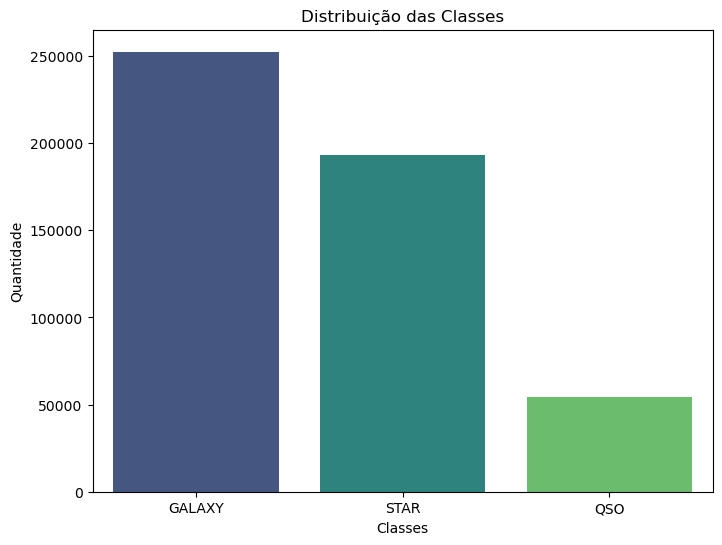


Gerando histogramas para as principais features...


/Users/diogomartins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diogomartins/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

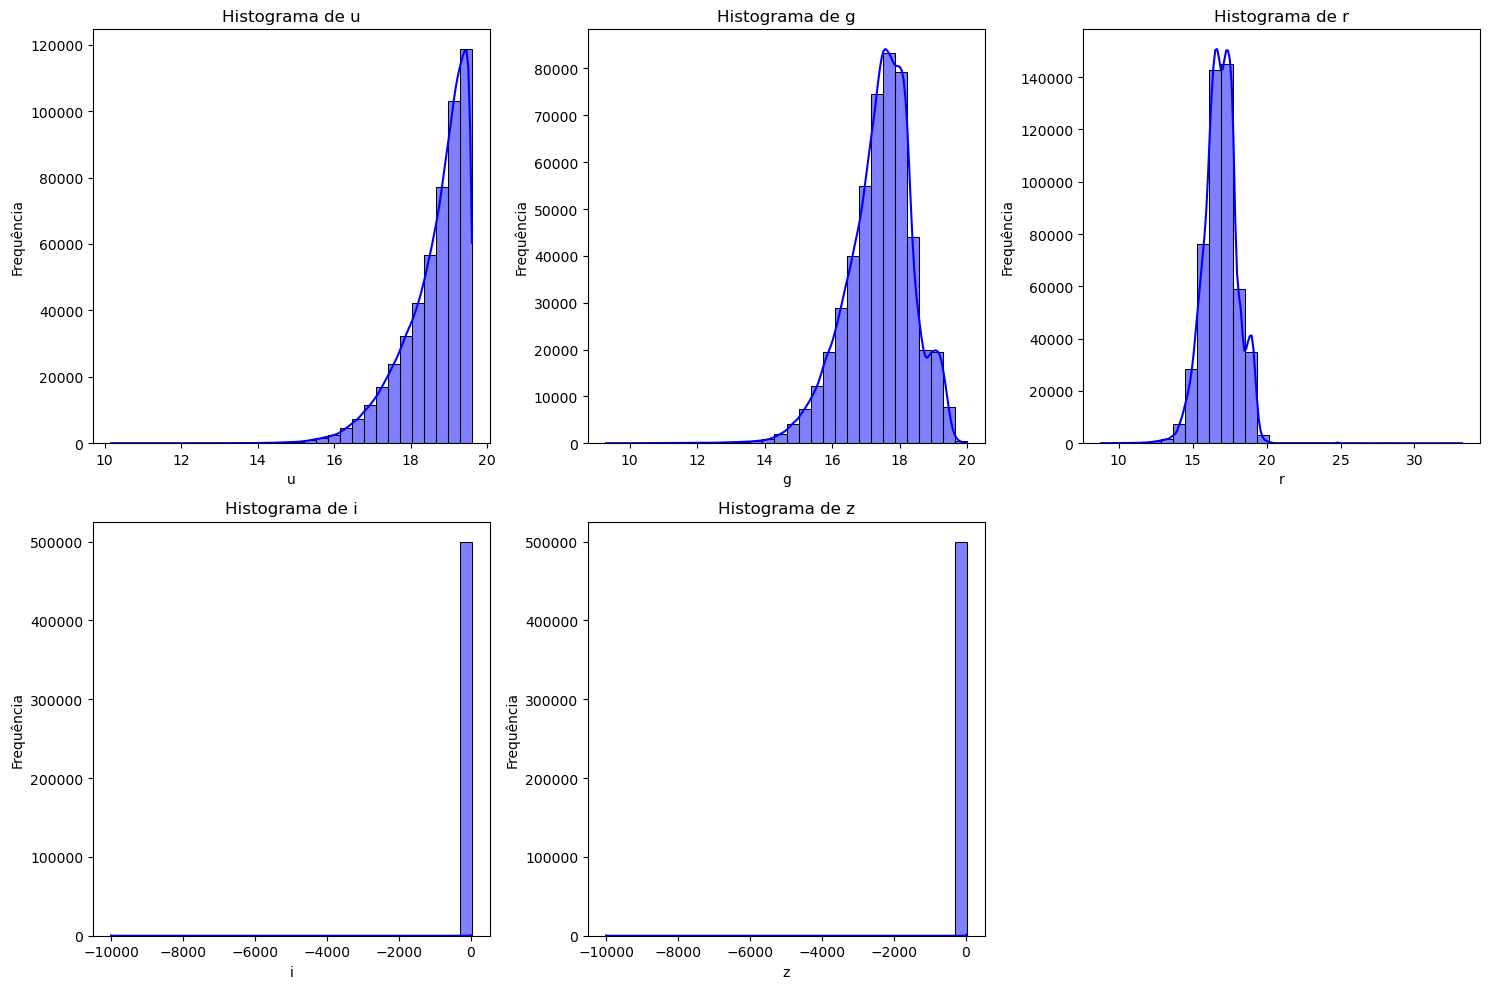

Análise dos dados concluída com sucesso!


In [2]:
# Exibindo informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())

# Exibindo a contagem de valores únicos para a coluna de classificação
print("\nDistribuição das classes (quantidade de estrelas, galáxias e quasares):")
print(df['class'].value_counts())

# Plotando a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index, palette='viridis')
plt.title("Distribuição das Classes")
plt.xlabel("Classes")
plt.ylabel("Quantidade")
plt.show()

# Selecionando algumas features principais para análise (por exemplo, 'u', 'g', 'r', 'i', 'z')
features = ['u', 'g', 'r', 'i', 'z']

# Substituindo valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Removendo linhas com valores NaN (se necessário)
df.dropna(inplace=True)

# Gerando histogramas para as principais features
print("\nGerando histogramas para as principais features...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Histograma de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

print("Análise dos dados concluída com sucesso!")


In [3]:
# 1. Verificando valores nulos ou em branco
print("\nVerificando valores nulos no dataset:")
print(df.isnull().sum())

# Se existirem valores nulos, vamos removê-los
if df.isnull().sum().sum() > 0:
    print("\nExistem valores nulos. Removendo essas linhas...")
    df.dropna(inplace=True)
    print("Valores nulos removidos.")

# 2. Guardando os nomes das colunas
colunas_originais = df.columns.tolist()
print("\nColunas originais guardadas para referência futura.")

# 3. Verificando e mapeando os labels (encoding das classes)
print("\nClasses únicas no dataset:")
print(df['class'].unique())

# Mapear as classes para valores numéricos
class_mapping = {'STAR': 0, 'GALAXY': 1, 'QSO': 2}
df['class'] = df['class'].map(class_mapping)

print("\nClasses mapeadas para valores numéricos:")
print(class_mapping)

# 4. Dropar dados desnecessários (Exemplo: colunas irrelevantes)
# Aqui você pode ajustar conforme o caso (e.g., IDs únicos que não ajudam na classificação)
columns_to_drop = ['objid', 'specobjid']  # Exemplos de colunas desnecessárias
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print(f"\nColunas desnecessárias removidas: {columns_to_drop}")

# 5. Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = df.drop('class', axis=1)  # Excluindo a coluna alvo para normalizar apenas as features
target = df['class']

features_scaled = scaler.fit_transform(features)
print("\nNormalização das features concluída.")

# Atualizando o DataFrame com os dados normalizados
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['class'] = target.values

print("\nDataset preparado com sucesso!")



Verificando valores nulos no dataset:
objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Colunas originais guardadas para referência futura.

Classes únicas no dataset:
['STAR' 'QSO' 'GALAXY']

Classes mapeadas para valores numéricos:
{'STAR': 0, 'GALAXY': 1, 'QSO': 2}

Colunas desnecessárias removidas: ['objid', 'specobjid']

Normalização das features concluída.

Dataset preparado com sucesso!


In [4]:
from sklearn.model_selection import train_test_split

# Separando features (X) e target (y)
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Exibindo as dimensões dos conjuntos
print(f"Conjunto de treinamento: {X_train.shape[0]} amostras, {X_train.shape[1]} features")
print(f"Conjunto de teste: {X_test.shape[0]} amostras, {X_test.shape[1]} features")

print("\nSplit de treino e teste realizado com sucesso!")


Conjunto de treinamento: 400000 amostras, 15 features
Conjunto de teste: 100000 amostras, 15 features

Split de treino e teste realizado com sucesso!


In [5]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score, learning_curve
import time
import numpy as np
import matplotlib.pyplot as plt

# Dicionário para armazenar os resultados
resultados_modelos = []

# Função genérica para treinar e avaliar modelos
def avaliar_modelo(nome_modelo, modelo, X_train, X_test, y_train, y_test):
    print(f"\nTreinando o modelo: {nome_modelo}...")
    # Medindo o tempo de treinamento
    inicio_treino = time.time()
    modelo.fit(X_train, y_train)
    fim_treino = time.time()

    # Fazendo predições
    inicio_pred = time.time()
    y_pred = modelo.predict(X_test)
    fim_pred = time.time()

    # Calculando probabilidades para ROC-AUC (se o modelo suportar)
    try:
        if len(modelo.classes_) > 2:  # Caso seja multiclasse
            y_pred_proba = modelo.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
        else:  # Caso seja binário
            y_pred_proba = modelo.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_auc = roc_auc * 100  # Convertendo para percentual
    except AttributeError:
        roc_auc = "N/A"

    # Calculando métricas
    acuracia = accuracy_score(y_test, y_pred) * 100  # Convertendo para percentual
    f1 = f1_score(y_test, y_pred, average='weighted') * 100  # Convertendo para percentual

    # Validação cruzada
    print(f"Executando validação cruzada para {nome_modelo}...")
    cv_scores = cross_val_score(modelo, np.vstack([X_train, X_test]), np.hstack([y_train, y_test]), cv=5)
    cv_mean = cv_scores.mean() * 100
    cv_std = cv_scores.std() * 100
    print(f"Validação Cruzada: {cv_mean:.2f}% ± {cv_std:.2f}%")

    # Salvando resultados
    resultados_modelos.append({
        "Modelo": nome_modelo,
        "Acurácia (%)": round(acuracia, 2),
        "F1-Score (%)": round(f1, 2),
        "ROC-AUC (%)": round(roc_auc, 2) if roc_auc != "N/A" else "N/A",
        "Tempo de Treinamento (s)": round(fim_treino - inicio_treino, 2),
        "Tempo de Predição (s)": round(fim_pred - inicio_pred, 2),
        "Validação Cruzada (%)": round(cv_mean, 2),
        "Std Validação (%)": round(cv_std, 2),
        "Interpretabilidade": "Alta" if nome_modelo in ["Decision Tree", "Random Forest"] else "Baixa"
    })

    print(f"Modelo {nome_modelo} avaliado com sucesso!")
    print(f"Acurácia: {acuracia:.2f}%, F1-Score: {f1:.2f}%, ROC-AUC: {roc_auc if roc_auc != 'N/A' else 'N/A'}\n")

    # Gerando curvas de aprendizado
    print(f"Gerando curvas de aprendizado para {nome_modelo}...")
    train_sizes, train_scores, test_scores = learning_curve(
        modelo, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Calculando médias e desvios padrão
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plotando as curvas de aprendizado
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia Treino")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia Validação")
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.title(f"Curvas de Aprendizado - {nome_modelo}")
    plt.xlabel("Tamanho do Conjunto de Treino")
    plt.ylabel("Acurácia")
    plt.legend(loc="best")
    plt.grid()
    plt.show()



Treinando o modelo: Decision Tree...
Executando validação cruzada para Decision Tree...
Validação Cruzada: 98.68% ± 0.02%
Modelo Decision Tree avaliado com sucesso!
Acurácia: 98.67%, F1-Score: 98.68%, ROC-AUC: 98.63120680637542

Gerando curvas de aprendizado para Decision Tree...


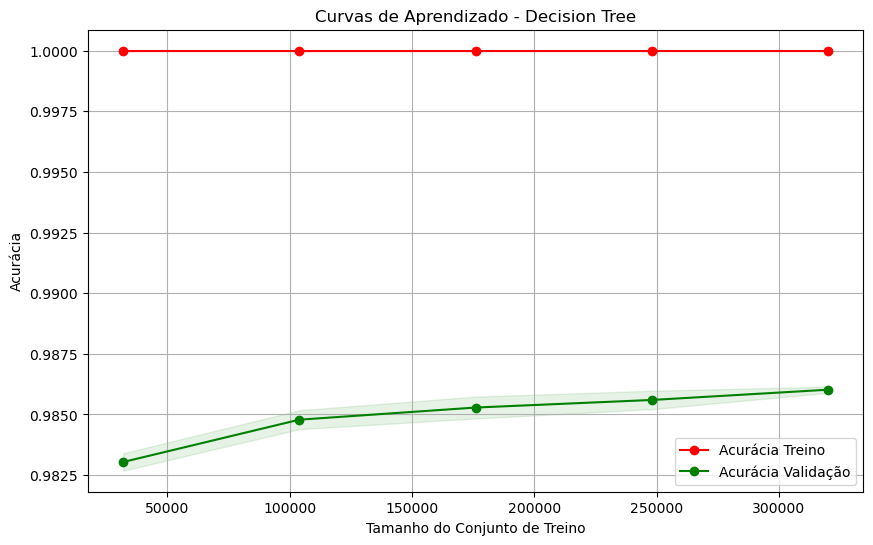

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Inicializando o modelo Decision Tree
modelo_dt = DecisionTreeClassifier(random_state=1)

# Avaliando o modelo
avaliar_modelo("Decision Tree", modelo_dt, X_train, X_test, y_train, y_test)



Treinando o modelo: Random Forest...
Executando validação cruzada para Random Forest...
Validação Cruzada: 99.02% ± 0.02%
Modelo Random Forest avaliado com sucesso!
Acurácia: 99.02%, F1-Score: 99.01%, ROC-AUC: 99.78183728198168

Gerando curvas de aprendizado para Random Forest...


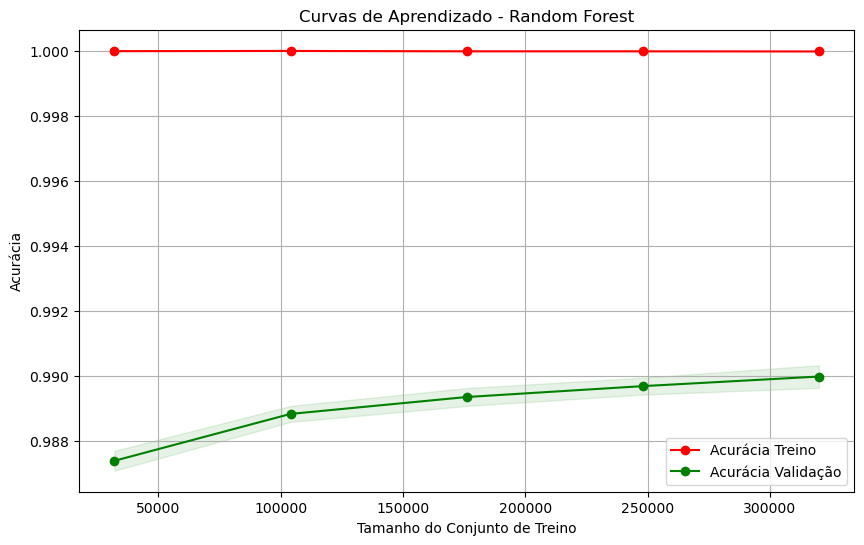

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Inicializando o modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=1, n_estimators=100)

# Avaliando o modelo
avaliar_modelo("Random Forest", modelo_rf, X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializando o modelo Gradient Boosting
modelo_gb = GradientBoostingClassifier(random_state=1, n_estimators=100, learning_rate=0.1)

# Avaliando o modelo
avaliar_modelo("Gradient Boosting", modelo_gb, X_train, X_test, y_train, y_test)



Treinando o modelo: Gradient Boosting...
Executando validação cruzada para Gradient Boosting...


In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicializando o modelo Logistic Regression
modelo_lr = LogisticRegression(random_state=1, max_iter=1000)

# Avaliando o modelo
avaliar_modelo("Logistic Regression", modelo_lr, X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Inicializando o modelo Naive Bayes (Gaussian)
modelo_nb = GaussianNB()

# Avaliando o modelo
avaliar_modelo("Naive Bayes", modelo_nb, X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.neural_network import MLPClassifier

# Inicializando o modelo MLPClassifier
modelo_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)

# Avaliando o modelo
avaliar_modelo("Rede Neural Rasa (MLP)", modelo_mlp, X_train, X_test, y_train, y_test)


In [ ]:
print("\nColunas disponíveis no DataFrame de resultados:")
print(resultados_df.columns)

### Extra


In [ ]:
from sklearn.svm import SVC

# Inicializando o modelo SVM
modelo_svm = SVC(kernel='rbf', random_state=1)

# Avaliando o modelo
avaliar_modelo("Support Vector Machine (SVM)", modelo_svm, X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Inicializando o modelo Extra Trees
modelo_et = ExtraTreesClassifier(random_state=1)

# Avaliando o modelo
avaliar_modelo("Extra Trees Classifier", modelo_et, X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.linear_model import SGDClassifier

# Inicializando o modelo SGDClassifier
modelo_sgd = SGDClassifier(loss='hinge', random_state=1)

# Avaliando o modelo
avaliar_modelo("Stochastic Gradient Descent (SGD)", modelo_sgd, X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializando o modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Avaliando o modelo
avaliar_modelo("K-Nearest Neighbors (KNN)", modelo_knn, X_train, X_test, y_train, y_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Inicializando o modelo AdaBoost
modelo_ab = AdaBoostClassifier(random_state=1, n_estimators=50)

# Avaliando o modelo
avaliar_modelo("AdaBoost Classifier", modelo_ab, X_train, X_test, y_train, y_test)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consolidando os resultados em um DataFrame
resultados_df = pd.DataFrame(resultados_modelos)

# Ordenando os resultados pela Acurácia
resultados_df.sort_values(by="Acurácia (%)", ascending=False, inplace=True)

# Criando uma tabela visual com as novas métricas
print("\nTabela de Resultados Comparativos dos Modelos:")

# Selecionando os dados para exibir no heatmap
heatmap_data = resultados_df[[
    "Modelo", "Acurácia (%)", "F1-Score (%)", "ROC-AUC (%)",
    "Validação Cruzada (%)", "Std Validação (%)", "Tempo de Treinamento (s)", "Tempo de Predição (s)"
]]

# Cálculo do range para cada coluna
col_ranges = {
    "Acurácia (%)": (heatmap_data["Acurácia (%)"].min(), heatmap_data["Acurácia (%)"].max()),
    "F1-Score (%)": (heatmap_data["F1-Score (%)"].min(), heatmap_data["F1-Score (%)"].max()),
    "ROC-AUC (%)": (heatmap_data["ROC-AUC (%)"].min(), heatmap_data["ROC-AUC (%)"].max()),
    "Validação Cruzada (%)": (heatmap_data["Validação Cruzada (%)"].min(), heatmap_data["Validação Cruzada (%)"].max()),
}

# Criando a tabela estilizada
fig, ax = plt.subplots(figsize=(12, 6))  # Ajustar o tamanho para mais métricas
ax.axis('off')  # Remover os eixos

# Adicionando a tabela ao gráfico
table = ax.table(
    cellText=heatmap_data.values,
    colLabels=heatmap_data.columns,
    loc='center',
    cellLoc='center',
    colLoc='center'
)

# Ajustando estilo da tabela
table.auto_set_font_size(False)
table.set_fontsize(8)  # Reduzir tamanho da fonte para ajustar melhor
table.auto_set_column_width(col=list(range(len(heatmap_data.columns))))

# Aplicando gradiente individualmente para as colunas relevantes
col_palettes = {
    "Acurácia (%)": plt.cm.Blues,
    "F1-Score (%)": plt.cm.Oranges,
    "ROC-AUC (%)": plt.cm.Greens,
    "Validação Cruzada (%)": plt.cm.Purples
}

for (row, col), cell in table._cells.items():
    if row > 0 and col > 0:  # Apenas células de métricas (não incluir "Modelo")
        column_name = heatmap_data.columns[col]
        if column_name in col_ranges:  # Garantir que é uma métrica numérica
            value = heatmap_data.iloc[row - 1, col]
            min_val, max_val = col_ranges[column_name]
            normalized_value = (value - min_val) / (max_val - min_val) if max_val > min_val else 0.5
            cell_color = col_palettes[column_name](normalized_value)

            # Aplicar cor de fundo e ajustar cor da fonte
            cell.set_facecolor(cell_color)
            text_color = "white" if normalized_value > 0.6 else "black"
            cell.get_text().set_color(text_color)
    else:
        cell.set_facecolor('white')  # Fundo branco para cabeçalhos

plt.title("Resultados Comparativos dos Modelos", fontsize=12, pad=10)
plt.tight_layout(pad=1)
plt.show()

# Gráfico 1: Comparação de Acurácia
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Acurácia (%)", y="Modelo", data=resultados_df, palette="Blues_d")
plt.title("Comparação de Acurácia dos Modelos")
plt.xlabel("Acurácia (%)")
plt.ylabel("Modelos")
plt.xlim(0, resultados_df["Acurácia (%)"].max() + 10)

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")
plt.show()

# Gráfico 2: Comparação de F1-Score
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="F1-Score (%)", y="Modelo", data=resultados_df, palette="Oranges_d")
plt.title("Comparação de F1-Score dos Modelos")
plt.xlabel("F1-Score (%)")
plt.ylabel("Modelos")
plt.xlim(0, resultados_df["F1-Score (%)"].max() + 10)

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")
plt.show()

# Gráfico 3: Comparação de Tempo de Treinamento
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Tempo de Treinamento (s)", y="Modelo", data=resultados_df, palette="Greens_d")
plt.title("Comparação de Tempo de Treinamento dos Modelos")
plt.xlabel("Tempo de Treinamento (s)")
plt.ylabel("Modelos")
plt.xlim(0, resultados_df["Tempo de Treinamento (s)"].max() + 30)

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f s")
plt.show()

# Gerar um dicionário de cores único baseado nos modelos
palette = sns.color_palette("husl", n_colors=len(resultados_df["Modelo"]))
model_colors = dict(zip(resultados_df["Modelo"], palette))

# Gráfico 4: Scatter Plot de Acurácia vs. Tempo de Treinamento
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Tempo de Treinamento (s)", y="Acurácia (%)", hue="Modelo", data=resultados_df, palette=model_colors, s=100)
plt.title("Relação entre Acurácia e Tempo de Treinamento")
plt.xlabel("Tempo de Treinamento (s)")
plt.ylabel("Acurácia (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico 5: Scatter Plot de F1-Score vs. Tempo de Predição
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Tempo de Predição (s)", y="F1-Score (%)", hue="Modelo", data=resultados_df, palette=model_colors, s=100)
plt.title("Relação entre F1-Score e Tempo de Predição")
plt.xlabel("Tempo de Predição (s)")
plt.ylabel("F1-Score (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
